### MY470 Computer Programming

### Final Assignment, MT 2019

#### \*\*\* Due 12:00 noon on Monday, January 20, 2020 \*\*\*

---
## Are victims of cheaters more likely to cheat?

The final assignment asks you to use the computational thinking and programming skills you learned in the course to answer an empirical social science question. You are expected to apply the best practices and theoretical concepts we covered in the course to produce a program that not only returns the correct output but is also legible, modular, and reasonably optimized. The assignment assumes mastery of loops, conditionals, and functions, as well as awareness of issues related to runtime performance.

In the assignment, we will study the social contagion of cheating on the massive multiplayer online game PlayerUnknown's Battlegrounds (PUBG). Cheating in this context means the adoption of unapproved software that gives the player an unfair advantage in the game (e.g. being able to see through walls). Our hypothesis is that players who are killed in the game by cheaters become likely to adopt cheating themselves. To test this hypothesis, we will first count how many victims of players become cheaters within a certain period of time. We will call these **victim–cheater motifs**. We will then simulate alternative universes in which the players played the same games in the same sequence but happened to be killed by someone else. Finally, we will compare how the count of the victim–cheater motifs observed in the actual data compares to what we would expect in a "randomized" world.  

**NOTE: You are only allowed to use fundamental Python data types (lists, tuples, dictionaries, numpy.ndarray, etc.) to complete this assignment.** You are not allowed to use advanced data querying and data analysis packages such as pandas, sqlite, networkx, or similar. We impose this restriction in order to test your grasp of fundamental programming concepts, not your scripting experience with Python libraries. 

#### Hints

Although this assignment is quite streamlined, imagine that the tasks here are part of a larger project. How would you structure your program if in the future you may need to use a different dataset with similar structure, manipulate the data differently, add additional analyses, or modify the focus of the current analysis? For example, consider placing helping functions in a separate file called `utils.py` or `tools.py`. These would be functions that you may need in different contexts and for different tasks. 

Keep different data manipulations in separate functions/methods and group related functions/classes in separate `.py` files. 


### Data

You will find the data in the repository [https://github.com/lse-my470/assignment-final-data.git](https://github.com/lse-my470/assignment-final-data.git). Please clone the data repository in the same directory where you clone the repository `assignment-final-yourgithubname`. Keep the name for the data folder `assignment-final-data`. Any time when you refer to the data in your code, please use a relative path such as `'../assignment-final-data/filename.txt'` instead of an absolute path such as `'/Users/myname/Documents/my470/assignment-final-data/filename.txt'`. This way, we will be able to test your submission with our own copy of the data without having to modify your code.

The data were collected by Jinny Kim (LSE ASDS MSc, 2019). The repository contains the following files:

* `cheaters.txt` – contains cheaters who played between March 1 and March 10, 2019
    1. player account id
    * estimated date when the player started cheating
    * date when the player's account was banned due to cheating
    
* `kills.txt` – contains the killings done in 6,000 randomly selected matches played between March 1 and March 10, 2019
    1. match id 
    * account id of the killer
    * account id of the player who got killed
    * time when the attack (killing) happened

#### Hints

When writing your code, test it on a small "toy dataset", instead of the entire data. This way, you won't need to wait for minutes/hours just to find out that you have a syntax error!

You should not modify the original data in any way. If your code creates new data files, you should save them in the directory where this file resides. 

### 1. Victims of cheaters turn into cheaters

Count how many individuals were killed at least once by a cheater and then started cheating within the next 5 days. We will assume here that we can only talk about a causal relationship if the two events (being killed by a cheater and starting to cheat) are relatively proximate in time (within 5 days of each other). In essence, we are looking for temporal motifs in which cheater A kills B and then B becomes cheater, but the timing between the two events should not be more than 5 days.  

#### Hint

Assume that a day starts at 0:00. 


### 2. Simulating an alternative universe

Of course, proximal in time does not necessarily mean causal. 

To establish causality, we will simulate an alternative world in which everything is the same but the cheater happens to kill someone else. If being a victim of cheating causes cheating, in the randomized world we will observe fewer victim–cheater motifs than in reality. To simulate an alternative universe, we will keep the timing and structure of interactions but randomly assign the identities of players. There are certain restrictions we need to observe, however: 

* Randomize within a game, not between games. 
* Randomize only games that have at least one cheater. The killings in games without cheaters do not affect the measure we are using.
* A player cannot kill if the player has been killed already.
* Since cheaters may tend to kill more or kill at a specific period in the game, we will preserve their position in the killing network. That is, only non-cheaters should be randomly reassigned. 

The figure below illustrates how shuffling should be completed:

![Match randomization](match_randomization_diagram.png)

#### Hints

This step may be time consuming so it is worth finding a way to save the data so that you don't need to run the randomization again and again while working on step 3 below. If you decide to do so, please write your code to save any such files with processed data in the directory where this file resides. This way, we can run your code without having to alter it.

Think about what is the most efficient way, both in terms of time and space, to save the data.


### 3. Evaluating reality against alternative universes 

Conduct 10 randomizations for the data. Then plot the number of victim–cheater motifs observed in the actual data compared to the distribution you get in the randomized data. What do you observe? What does this tell us? (Write 2-3 sentences to reflect on the answer. You will not be marked on what you write but wouldn't it be a waste to do all of this work and not even try to think about what the results mean?) 

### Hint

One way to visualize the results is with a histogram for the randomized network and a vertical line for the real network. Since we only have 10 randomized observations, this may not look that well, so feel free to experiment with other plot types.


## Import and run your code here

Keep your code in separate `.py` files and then import it in the code cell below. Then call the functions/methods you need to conduct the analysis described above. We should be able to run the cell below to calculate again the results and get the requested output, without having to modify your code in any way. 

In [1]:
#### Question 1

## --- Firstly, import two txt files into nested lists ---

cheater_lst = []
for line in open('assignment-final-data/cheaters.txt', 'r'):
    cheater_lst.append(line.strip('\n').split('\t'))
        

killing_lst = []
for line in open('assignment-final-data/kills.txt', 'r'):
    killing_lst.append(line.strip('\n').split('\t'))
        

### --- Secondly, Find victim–cheater motifs ---


import timecounter
import peoplecounter

peoplecounter.counter(killing_lst, cheater_lst)

The amount of that victim–cheater motifs is 29.


In [2]:
#### Question 2

## --- Firstly, filter useful killing data for simulation --- 

# only the game have at least one cheater should be kept
# filter out all games without cheaters

cheaters_id = []
for i in range(len(cheater_lst)):
    cheaters_id.append(cheater_lst[i][0])
        
cheaters_tm = []
for i in range(len(cheater_lst)):
    cheaters_tm.append(cheater_lst[i][1])
    
cheaterdic = dict(zip(cheaters_id, cheaters_tm))

useful_killing = []
for each_killing in killing_lst:
    if each_killing[1] in cheaters_id and each_killing[3] >= cheaterdic[each_killing[1]]:
        useful_killing.append(each_killing)
    elif each_killing[2] in cheaters_id and each_killing[3] >= cheaterdic[each_killing[2]]:
        useful_killing.append(each_killing)

## --- Next, create an empty dictionary, where key is the unique match-id numbers ---     
unique_gm = []

for i in range(len(useful_killing)):
    game_id = useful_killing[i][0]
    unique_gm.append(game_id)
unique_match_gameid = list(set(unique_gm))
game_dic = {k:[] for k in unique_match_gameid}
# len(unique_match_gameid)
# the result is 3000, only half of the match id are kept
#store all killing relationships within for these 3000 games

## --- Thirdly, store all killing relationships within for these 3000 game in a big dictionary ---
for a, b, c, d in killing_lst:
    if a in unique_match_gameid:
        game_dic[a].append([a, b, c, d])
        
## --- Simulation Scheme could be checked in generalisation.py file

In [3]:
#### Question 3 - Repeate 10 Simulations

import generalisation
import timecounter
import peoplecounter

n = 0
while n < 10:
    
    simulated_universe = []
    for i in game_dic:
        simgame = game_dic[i]# create all_kiling_lst parameter for stimulated
        simulated_universe.extend(generalisation.stimulated(simgame, cheaters_id, cheaterdic)) 

    peoplecounter.counter(simulated_universe, cheater_lst)
    n = n + 1

The amount of that victim–cheater motifs is 44.
The amount of that victim–cheater motifs is 37.
The amount of that victim–cheater motifs is 36.
The amount of that victim–cheater motifs is 39.
The amount of that victim–cheater motifs is 48.
The amount of that victim–cheater motifs is 33.
The amount of that victim–cheater motifs is 46.
The amount of that victim–cheater motifs is 36.
The amount of that victim–cheater motifs is 21.
The amount of that victim–cheater motifs is 23.


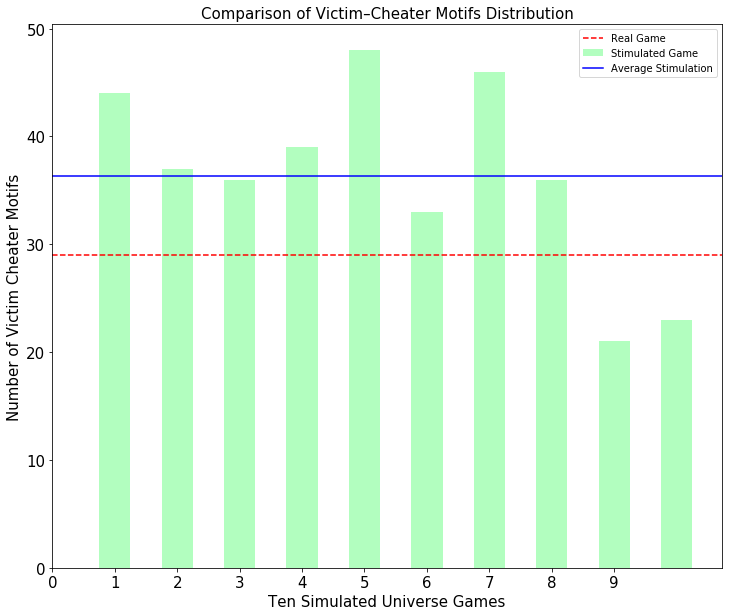

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

indexvcm = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
stimu_vcm = np.array([44, 37, 36, 39, 48, 33, 46, 36, 21, 23])
# stimu_vcm just store the result of one ten-time simulation. 
# This might change when we run again.
# However, the distribution of those ten numbers will be the same.

plt.figure(figsize = [12, 10])

l2 = plt.bar(indexvcm, stimu_vcm, width = 0.5, color = '#9ffeb0',alpha = 0.8)


my_x_ticks = np.arange(0, 10, 1)

l1 = plt.axhline(y = 29, color = 'r', linestyle = '--')
l3 = plt.axhline(y = np.average(stimu_vcm), color = 'b', linestyle = '-')
plt.xlabel('Ten Simulated Universe Games', fontsize = 15)
plt.ylabel('Number of Victim Cheater Motifs', fontsize = 15)
plt.title('Comparison of Victim–Cheater Motifs Distribution', fontsize = 15)
plt.legend(handles=[l1,l2, l3],labels=['Real Game','Stimulated Game','Average Stimulation'],loc='best')


plt.xticks(my_x_ticks, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

**The red dashed line represents the reality situation and the blue line shows the average level in simulation universe. After the simulation, it seems that most of the results are higher than the number we get in the real game. Therefore, it could not give us a strong confidence to say being cheated is an important motivation for becoming a cheater. Maybe an althernative methodology should be designed to test our hypothesis. My conclusion therefore seems to be that being cheated by others might encourage yourself to become a cheater, but there is no a strong correlation or positive connection between them. Altough the answer gives weak confidecnce to the hypothesis, the results will change with the increase of the simulation size.**

---

### Evaluation

| Aspect | Mark     | Comment   
|:-------:|:--------:|:----------------------
| Code runs      |   /10    |              
| Accuracy       |   /40    | 
| Legibility     |   /10    | 
| Modularity     |   /10    | 
| Order-of-growth optimization      |   /20    | 
| Additional runtime and space optimization   |   /10    | 
|**Total**|**/100**  | 
